In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.width', 55)
import seaborn as sns
import matplotlib.pyplot as plt
df_raw = pd.read_csv(r"/workspaces/ts-hybrid-forecasting-model/univariate/evaluations/ridge_lasso_enr_dt/mse.csv")
data = pd.read_csv(r"/workspaces/ts-hybrid-forecasting-model/univariate/evaluations/ridge_lasso_enr_dt/mse.csv", index_col=0)
df_dataset_removed = pd.read_csv("/workspaces/ts-hybrid-forecasting-model/univariate/evaluations/ridge_lasso_enr_dt/mse.csv").drop(columns="fname", axis = 1)

We scaled the data using min max scaling to enable comparison and to prevent scale of each dataset affect the interpretation.

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_dataset_removed = pd.DataFrame(scaler.fit_transform(df_dataset_removed), columns=df_dataset_removed.columns)
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

The csv file consist of the performance of machine learning models against sampled univariate time series data from M4 competition (i.e., from each domain, we sampled 50 datasets). MSE was used as an evaluation metrics (performance metrics). 

Basic summary

In [ ]:
df_dataset_removed.describe()

,ridge,lasso,enr,dt,ridge_lasso_enr_dt
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.017555,0.022692,0.017269,0.017184,0.009624
std,0.095081,0.103713,0.088509,0.090246,0.070540
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000142,0.000185,0.000128,0.000078,0.000055
50%,0.000625,0.000749,0.000505,0.000439,0.000227
75%,0.002774,0.004647,0.002958,0.002127,0.001297
max,1.000000,1.000000,1.000000,1.000000,1.000000


Side-by-side box plot

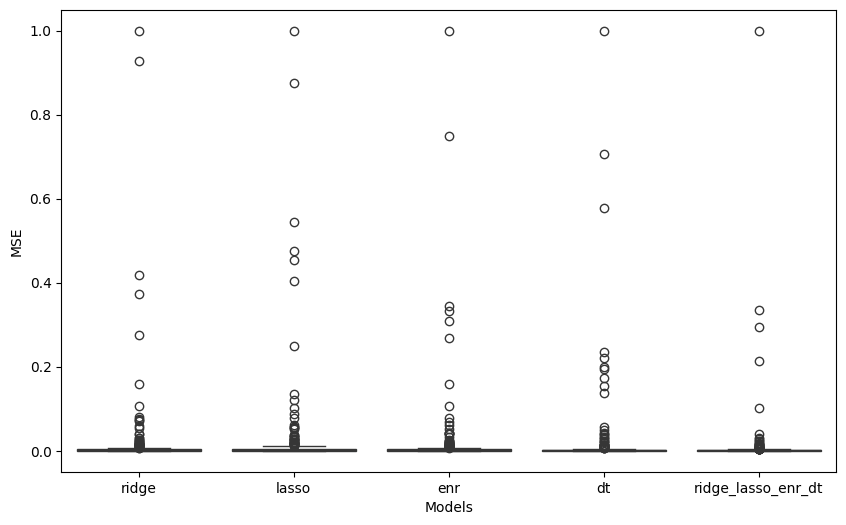

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dataset_removed, palette="Blues")
# Show the plot
plt.xlabel("Models")  # Replace with your x-axis label
plt.ylabel("MSE")  # Replace with your y-axis label
# plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

In [5]:
from scipy.stats import ttest_ind, ttest_rel

# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and ARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["ridge"].values

t_stat, p_value = ttest_rel(group1, group2, alternative="less")
print("one-tailed test - ridge_lasso_enr_dt and ridge: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")

# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["lasso"].values

t_stat, p_value = ttest_rel(group1, group2, alternative="less")
print("one-tailed test - ridge_lasso_enr_dt and lasso: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")


# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["enr"].values

t_stat, p_value = ttest_rel(group1, group2, alternative="less")
print("one-tailed test - ridge_lasso_enr_dt and enr: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")


# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["dt"].values

t_stat, p_value = ttest_rel(group1, group2, alternative="less")
print("one-tailed test - ridge_lasso_enr_dt and dt: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")

one-tailed test - ridge_lasso_enr_dt and ridge: 
T-statistic: -2.848428030225796, P-value: 0.0024
one-tailed test - ridge_lasso_enr_dt and lasso: 
T-statistic: -3.150206095906545, P-value: 0.0009
one-tailed test - ridge_lasso_enr_dt and enr: 
T-statistic: -3.1216833541323727, P-value: 0.0010
one-tailed test - ridge_lasso_enr_dt and dt: 
T-statistic: -2.283528587334263, P-value: 0.0116


In [6]:
from scipy.stats import ttest_ind, ttest_rel

# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and ARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["ridge"].values

t_stat, p_value = ttest_ind(group1, group2, alternative="less", equal_var=False)
print("one-tailed test - ridge_lasso_enr_dt and ridge: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")

# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["lasso"].values

t_stat, p_value = ttest_ind(group1, group2, alternative="less", equal_var=False)
print("one-tailed test - ridge_lasso_enr_dt and lasso: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")


# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["enr"].values

t_stat, p_value = ttest_ind(group1, group2, alternative="less", equal_var=False)
print("one-tailed test - ridge_lasso_enr_dt and enr: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")


# alternative hyphothesis: group1 > group2
# ridge_lasso_enr_dt  and SARIMA
# group1
group1 = df_dataset_removed["ridge_lasso_enr_dt"].values
# group2
group2 = df_dataset_removed["dt"].values

t_stat, p_value = ttest_ind(group1, group2, alternative="less", equal_var=False)
print("one-tailed test - ridge_lasso_enr_dt and dt: ")
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")

one-tailed test - ridge_lasso_enr_dt and ridge: 
T-statistic: -1.0592198391994618, P-value: 0.1450
one-tailed test - ridge_lasso_enr_dt and lasso: 
T-statistic: -1.6472768600406544, P-value: 0.0501
one-tailed test - ridge_lasso_enr_dt and enr: 
T-statistic: -1.068014142665725, P-value: 0.1430
one-tailed test - ridge_lasso_enr_dt and dt: 
T-statistic: -1.0435038575595292, P-value: 0.1486


Side-by-side box plot where outliers are removed using IQR method. 

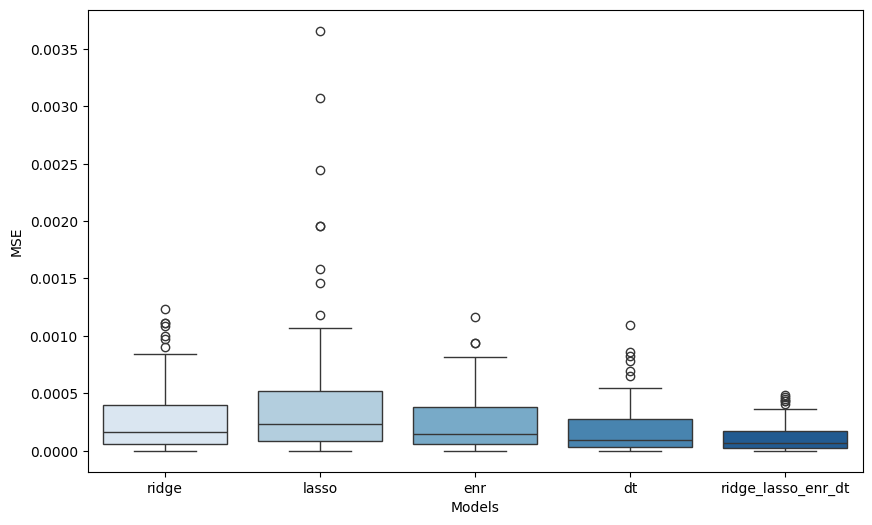

In [7]:
# Function to detect and remove outliers using the IQR method
# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df):
    df = df.copy(deep=True)
    for col in df.select_dtypes(
        include="number"
    ).columns:  # Loop through each numerical column
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the value in this column is an outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Assuming df is your original DataFrame
df_clean = remove_outliers_iqr(df_dataset_removed)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, palette="Blues")
plt.xlabel("Models")  # Replace with your x-axis label
plt.ylabel("MSE")  # Replace with your y-axis label

# Show the plot
# plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

average rank of model's performance

In [8]:
# Rank each model's performance (lower MAE = better performance, so rank ascending)
ranked_data = data.rank(axis=1, method='average', ascending=True)
# Calculate the average rank for each model across all datasets
average_ranks = ranked_data.mean(axis=0).sort_values()
# print("Average Ranks for Each Model:\n", average_ranks)
average_ranks

ridge_lasso_enr_dt    1.532
dt                    2.292
enr                   2.948
ridge                 3.708
lasso                 4.520
dtype: float64

Bar graph of average rank of model's performance

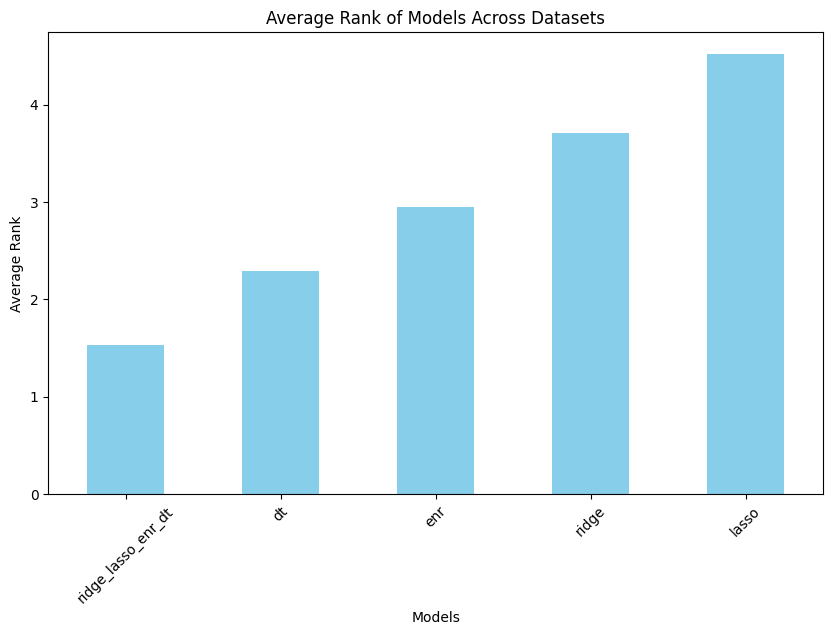

In [9]:
average_ranks.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Rank of Models Across Datasets')
plt.ylabel('Average Rank')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

Heat map of model ranking per dataset

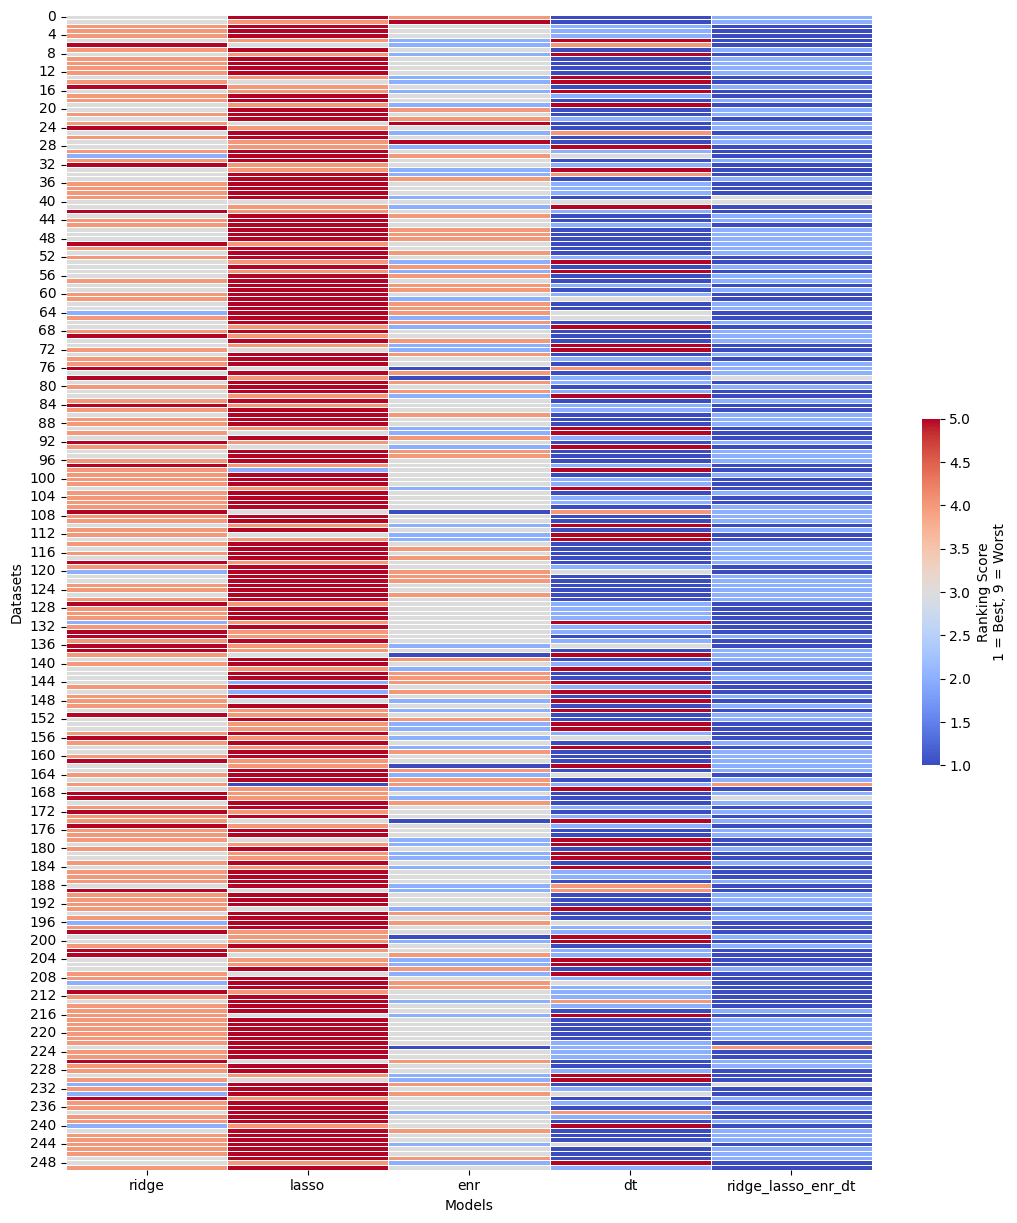

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap of ranked models with a smaller color bar
plt.figure(figsize=(13, 15))
sns.heatmap(
    ranked_data,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Ranking Score\n1 = Best, 9 = Worst', 'shrink': 0.3}  # Adjust shrink value
)

# Add labels for the plot
# plt.title('Model Rankings per Dataset')
plt.xlabel('Models')
plt.ylabel('Datasets')

plt.show()




